<a href="https://colab.research.google.com/github/junaina/learning-fyp-tools/blob/main/LearningAudioProcessinginPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `IMPORTS and Dataset Load`



In [4]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nurjunaina
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio


100%|██████████| 429M/429M [00:01<00:00, 275MB/s]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob # lists all the files in a dir
import librosa
import librosa.display

import IPython.display as ipd

#imports for colors and prettifying
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle= cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])



In [6]:
audio_files=glob('/content/ravdess-emotional-speech-audio/*/*.wav') #the first * allows glob to replace the folder name
 #and the second allows it to substitute the file names that may be inside the folder


In [9]:
ipd.Audio(audio_files[0]) #adding an audio player to listen to the audio

In [7]:
y, sr =librosa.load(audio_files[0]) #y is the raw data of the audio file and sr is the sample rate(think audio resolution)

In [8]:
print (f"y:{y[:10]}") #first 10 values of y

print(f"shape y:{y.shape}")
print(f"sr:{sr}")

y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y:(88289,)
sr:22050


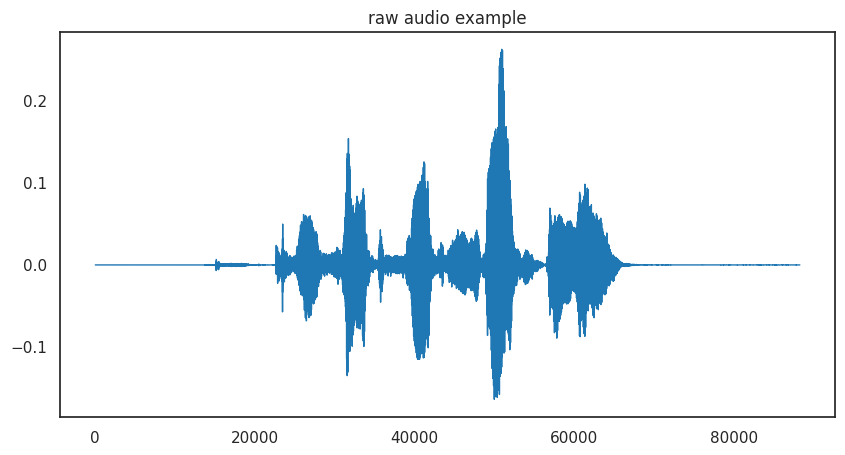

In [9]:
pd.Series(y).plot(figsize=(10,5), lw=1, title="raw audio example")
plt.show()

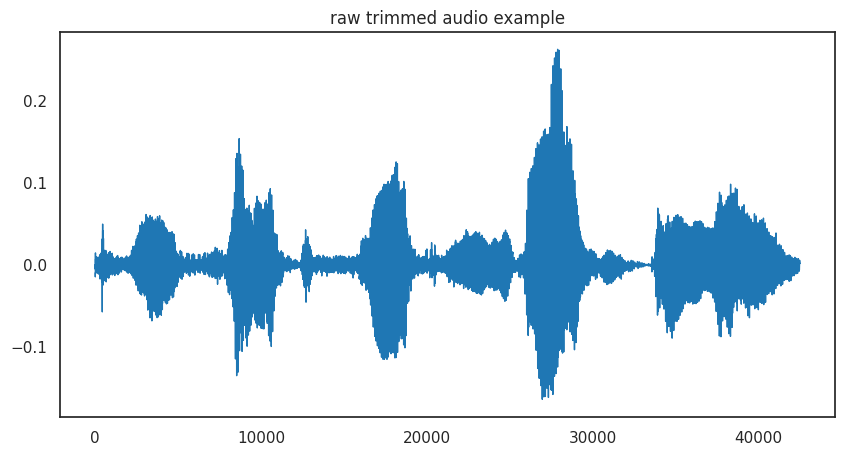

In [10]:
#trims leading and trailing silences in the audio
y_trimmed, _=librosa.effects.trim(y, top_db=20) #lower the top db, greater the trim. (this trims all audio below 20db)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="raw trimmed audio example")
plt.show()

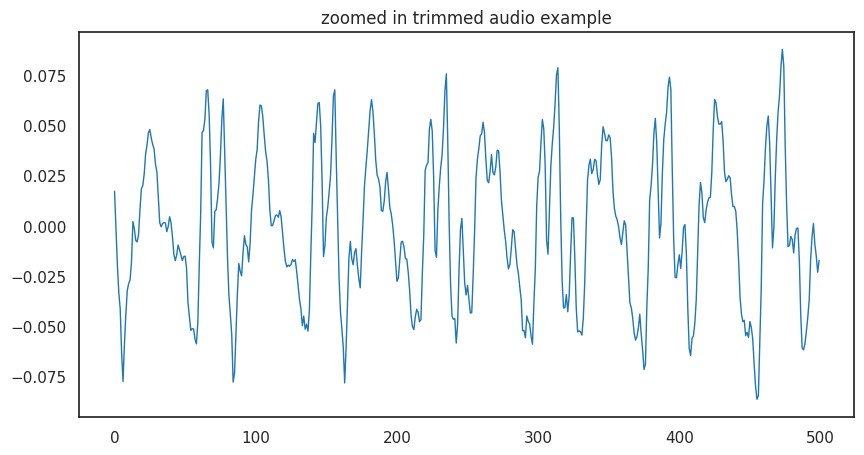

In [11]:
#zooming into the audio waves- slicing from section 10,000 to 10,500
pd.Series(y_trimmed[10000:10500]).plot(figsize=(10,5), lw=1, title="zoomed in trimmed audio example")
plt.show()

In [15]:
# fourier transforming te audio signal
D= librosa.stft(y)
S_db= librosa.amplitude_to_db(np.abs(D), ref= np.max)
S_db.shape

(1025, 173)

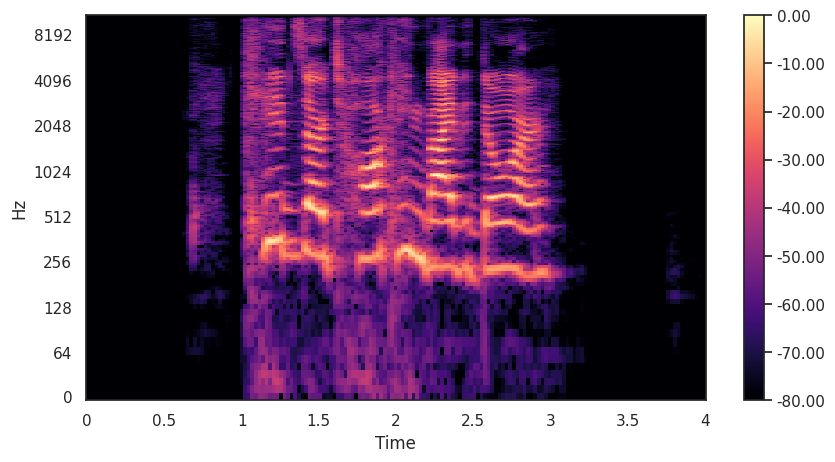

In [18]:
#spectogram plot
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [26]:
#mel spectogram
#melodic spectogram, yused to express frequencies of the audio
S= librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2,)
S_db_mel= librosa.amplitude_to_db(S, ref= np.max)
#S.shape

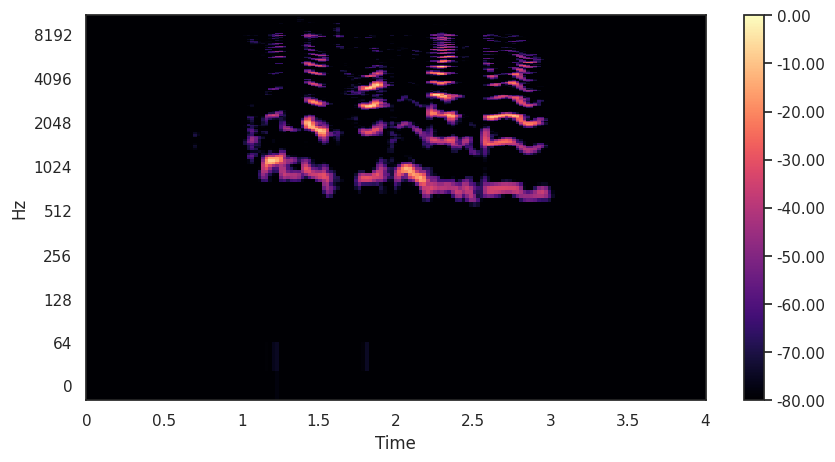

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()
#s_db_mel and s_db can be fed to a machine learning model and used to extract features